<a href="https://colab.research.google.com/github/shreyus3003/Omdena/blob/master/trashout_dumpsite_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
!unzip '/content/Asia_trash_points_trashout_export_2020-06-23_15-19.zip'

Archive:  /content/Asia_trash_points_trashout_export_2020-06-23_15-19.zip
 extracting: 2020-06-23_0.csv        


In [ ]:
df= pd.read_csv('/content/2020-06-23_0.csv', sep=';')

In [ ]:
#number of rows and columns
df.shape

(1512, 21)

In [ ]:
df.head()

,id,latitude,longitude,continent,country,aa1,aa2,aa3,locality,subLocality,types,updateTime,updateNeeded,note,url,status,size,anonymous,created,accessibility,image
0,57823,32.354964,35.019643,Asia,Israel,Center District,HaSharon,NaN,Bahan,Bahan,domestic,2020-06-22T07:10:14.884Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,cleaned,bag,False,2020-06-22T06:25:01.411Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
1,57814,34.929792,32.862968,Asia,Cyprus,Limassol,NaN,NaN,NaN,Limassol,"deadAnimals,plastic",2020-06-21T11:17:53.751Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,bag,False,2020-06-21T11:17:53.751Z,notForGeneralCleanup,https://firebasestorage.googleapis.com/v0/b/tr...
2,57758,40.235476,44.505753,Asia,Armenia,Kotayk Province,NaN,NaN,Zovuni,Zovuni,metal,2020-06-15T10:08:23.046Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,wheelbarrow,False,2020-06-15T10:08:23.046Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
3,57594,-6.119567,106.661225,Asia,Indonesia,Banten,Kota Tangerang,Benda,NaN,RW 010,"electronic,glass,metal,plastic,domestic",2020-06-04T12:22:35.542Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-04T12:22:35.542Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...
4,57585,-2.677623,118.889706,Asia,Indonesia,Sulawesi Barat,Kabupaten Mamuju,Kecamatan Mamuju,NaN,Binanga,"glass,metal,plastic,domestic",2020-06-02T22:06:37.892Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-02T22:06:37.892Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...


In [ ]:
df['image'][4]

'https://firebasestorage.googleapis.com/v0/b/trashoutngo-dev.appspot.com/o/images%2FE14CFE2E-EB14-4340-88BD-DF5B2924DA1F.jpg?alt=media&token=6a228175-6011-449b-b6b0-f3647718718a'

In [ ]:
#sum of null values of all columns
df.isnull().sum()

id                  0
latitude            0
longitude           0
continent           0
country             0
aa1                75
aa2               413
aa3              1170
locality          746
subLocality       905
types               0
updateTime          0
updateNeeded        0
note             1137
url                 0
status              0
size                0
anonymous           0
created             0
accessibility    1200
image              58
dtype: int64

In [ ]:
#Missing percentage of column accessibility
missing = df[df['accessibility'].isnull()]
missing_perc = len(missing) / len(df) * 100
print('Missing Total: {}\nMissing Percentage of column accessibility: {:.2f}%'.format(len(missing), missing_perc))

#Missing percentage of column aa3
missing = df[df['aa3'].isnull()]
missing_perc = len(missing) / len(df) * 100
print('Missing Total: {}\nMissing Percentage of column aa3: {:.2f}%'.format(len(missing), missing_perc))




Missing Total: 1200
Missing Percentage of column accessibility: 79.37%
Missing Total: 1170
Missing Percentage of column aa3: 77.38%


In [ ]:
#dropping duplicate rows
df= df.drop_duplicates(subset=df.columns,keep='first')
df.head()

,id,latitude,longitude,continent,country,aa1,aa2,aa3,locality,subLocality,types,updateTime,updateNeeded,note,url,status,size,anonymous,created,accessibility,image
0,57823,32.354964,35.019643,Asia,Israel,Center District,HaSharon,NaN,Bahan,Bahan,domestic,2020-06-22T07:10:14.884Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,cleaned,bag,False,2020-06-22T06:25:01.411Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
1,57814,34.929792,32.862968,Asia,Cyprus,Limassol,NaN,NaN,NaN,Limassol,"deadAnimals,plastic",2020-06-21T11:17:53.751Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,bag,False,2020-06-21T11:17:53.751Z,notForGeneralCleanup,https://firebasestorage.googleapis.com/v0/b/tr...
2,57758,40.235476,44.505753,Asia,Armenia,Kotayk Province,NaN,NaN,Zovuni,Zovuni,metal,2020-06-15T10:08:23.046Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,wheelbarrow,False,2020-06-15T10:08:23.046Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
3,57594,-6.119567,106.661225,Asia,Indonesia,Banten,Kota Tangerang,Benda,NaN,RW 010,"electronic,glass,metal,plastic,domestic",2020-06-04T12:22:35.542Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-04T12:22:35.542Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...
4,57585,-2.677623,118.889706,Asia,Indonesia,Sulawesi Barat,Kabupaten Mamuju,Kecamatan Mamuju,NaN,Binanga,"glass,metal,plastic,domestic",2020-06-02T22:06:37.892Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-02T22:06:37.892Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...


In [ ]:
df.shape #same number of rows before and after dropping duplicate rows, that means there are no duplicate rows.

(1512, 21)

In [ ]:
#counts of dumps by country
df['country'].value_counts()

Turkey                  272
Indonesia               247
Kazakhstan              191
Philippines             163
Jordan                   91
India                    84
Nepal                    62
Lebanon                  38
Armenia                  30
Israel                   28
Cyprus                   27
Pakistan                 26
Malaysia                 25
Vietnam                  25
Georgia                  25
Thailand                 21
Taiwan                   17
Yemen                    16
Japan                    15
Cambodia                 13
Iraq                     12
Azerbaijan               10
Bangladesh                9
Kuwait                    8
Singapore                 7
South Korea               7
Mongolia                  6
Sri Lanka                 6
China                     5
Uzbekistan                4
Hong Kong                 4
Tajikistan                3
Laos                      2
United Arab Emirates      2
Russian Federation        2
Kyrgyzstan          

In [ ]:
#scatterplot to visualize our geospatial data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.scatterplot(df['latitude'], df['longitude'])

In [ ]:
!pip install geopandas

     |████████████████████████████████| 962kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 10.5MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 


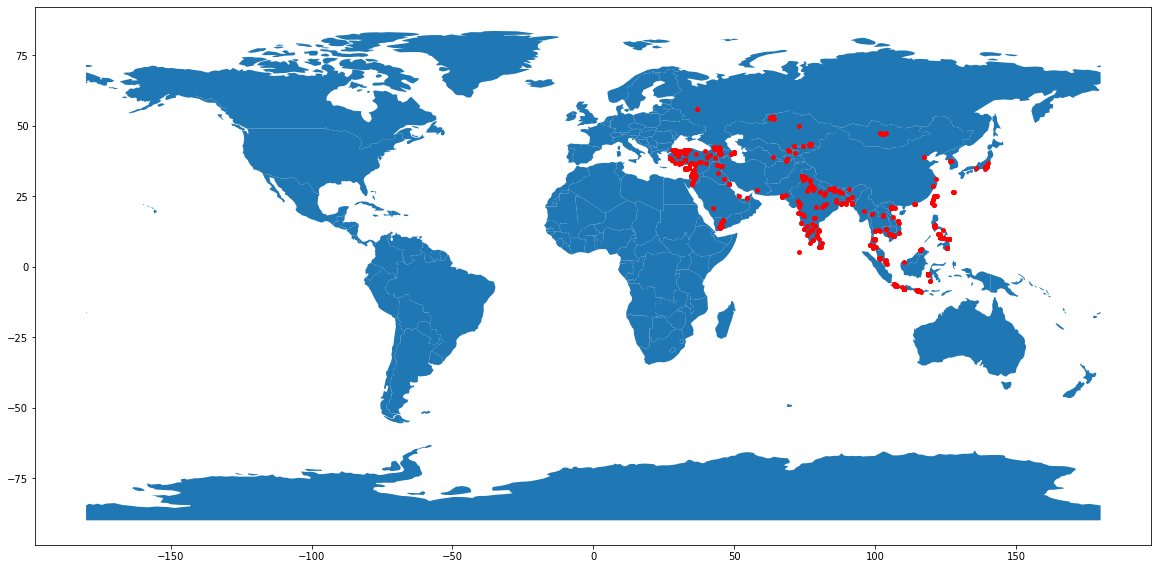

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


#df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 20)), marker='o', color='red', markersize=15);

In [ ]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities

In [ ]:
# import geoplot
# africa = world.query('continent == "Africa"')
# ax = geoplot.cartogram(
#     africa, scale='pop_est', limits=(0.2, 1),
#     edgecolor='None', figsize=(7, 8)
# )
# geoplot.polyplot(africa, edgecolor='gray', ax=ax)

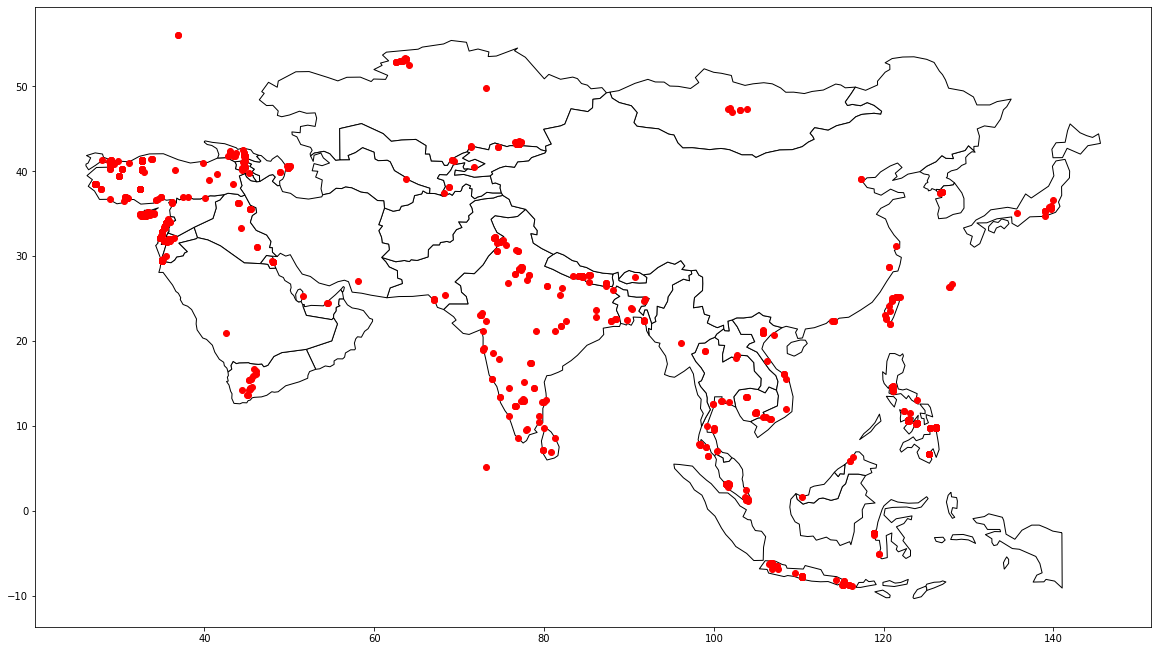

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#ax = world[world.continent == 'Asia'].plot(figsize=(20, 20),color='white', edgecolor='black')
#ax = world[]

gdf.plot(ax=ax, color='red')

plt.show()